<a href="https://colab.research.google.com/github/ahmdbnrsl/Machine-Learning/blob/main/Mathematics-Requirements/Calculus.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**CALCULUS AND OPTIMIZATION**

**1. Extrema**

"Much of machine learning is about minimizing a cost function"
=> Banyak aspek dalam machine learning itu intinya adalah meminimalkan fungsi biaya.
Maksudnya, kita ingin model kita belajar dari data sedemikian rupa agar kesalahan prediksinya sekecil mungkin.
"(also called an objective function in the optimization community)"
=> Di kalangan orang-orang yang fokus pada bidang optimasi matematis, cost function juga dikenal dengan nama objective function.
Jadi dua istilah ini mirip, cuma beda konteks:

ML → cost/loss function

Optimization → objective function

"which is a scalar function of several variables"
=> Fungsi ini menghasilkan nilai skalar (misalnya: 0.25, 17.8, dst),
dan nilai itu tergantung pada banyak variabel (misalnya: bobot model, bias, dll).
Jadi secara matematis, bentuknya kayak:

$J(\theta_1, \theta_2, \dots, \theta_n) \in \mathbb{R}$

"that typically measures how poorly our model fits the data we have."
=> Nilai dari cost function ini menunjukkan seberapa buruk model kita mempelajari data.
Semakin tinggi nilainya → semakin jelek model kita.
Jadi target kita? Minimalkan nilai ini.

contoh soal :

tentukan nilai minima dan maxima dari : $f(x) = -x^3 + 3x^2 + 9x + 2$

langkah-langkah :

1. Turunkan fungsi terlebih dahulu

$f'(x) = -3x^2 + 6x$

2. Cari titik kritis (Critical Point) : $f'(x) = 0$

cari $x$ atau domain yang memenuhi persamaan $-3x^2 + 6x = 0$

maka ketemulah $-1, 3$

3. Turunkan fungsi lagi $f''(x)$

$f''(x) = -6x + 6$

4. Subtitusikan critical points ke $f''(x)$

$f''(-1) = -6(-1) + 6 = 12, > 0$ maka ini adalah nilai minimum

$f''(3) = -6(3) + 6 = -12, < 0$ maka ini adalah nilai maksimum

5. Subtitusikan Critical points ke $f(x)$

$f(-1) = -1(-1)^3 + 3(-1)^2 + 9(-1) + 2 = -3$

$f(3) = -3^3 + 3(3)^2 + 9(3) + 2 = 29$

nilai minimanya adalah : $(-1, -3)$

nilai maximanya adalah : $(3, 29)$

In [ ]:
import sympy as sp

x = sp.symbols('x')

f = -x**3 + 3*(x**2) + 9*x + 2

# turunan 1
f_1 = sp.diff(f, x)

# critical point
eq = sp.Eq(f_1, 0)
critical_point = sp.solve(eq, x)

# turunan 2
f_2 = sp.diff(f_1)

# subtitusi critical point ke f''(x)
min_max = []
for i in critical_point:
    min_max.append(f_2.subs({x : i}))

# subtitusi critical point ke f(x)
locale_min_max = []
for i in critical_point:
    locale_min_max.append(f.subs({x : i}))

critical_point, min_max, locale_min_max

([-1, 3], [12, -12], [-3, 29])

**Local maxima dan minima pada fungsi multi variable**

contoh : cari titik maximum minimum dari $f(x, y) = x^3 + y^3 - 3xy$

langkah-langkah :

cari turunan parsial pertama dari x, dan y

turunkan $f_x$ anggap $y$ sebagai konstanta

$f_x = 3x^2 - 3y$

turunkan $f_y$ anggap $x$ sebagai konstanta

$f_y = 3y^2 - 3x$

cari titik kritis, jika masih ada 2 variable, gunakan sistem persamaan

$f_x = 3x^2 - 3y$ => $x^2 = y$

$f_y = 3y^2 - 3x$ => $y^2 = x$

maka satu-satunya solusi adalah 0, dan 1, untuk $x, y$

cari $f_xx$ dan $f_yy$

$f_xx = 6x$

$f_yy = 6y$

cari $f_xy$

$f_xy = 3$

cari diskriminan $D = f_xx.f_yy - (f_xy)^2$

$D = (6x)(6y) - (3)^2$

subtitusi titik kritis ke $f_xx$ dan $f_yy$

- titik kritis $(1, 1)$

$D = (6)(6) - (3)^2 = 27$ Local Minimum

- titik kritis $(0, 0)$

$D = 0 - (3)^2 = -9$ => Saddle Point

Subtitusi titik kritis ke $f(x, y)$

- titik kritis (1, 1)

$f(1, 1) = 1^3 + 1^3 - 3(1)(1) = -1$ =>  $(1, 1, -1)$

Local Minimum : $-1$

- titik kritis (0, 0)

$f(0, 0) = 0$ => $(0, 0, 0)$

Saddle Point : $0$

In [ ]:
import sympy as sp

x, y = sp.symbols('x y')

def f_1(x, y):
    return x**3 + y**3 - 3*x*y

# turunan pertama f(x) dan f(y)
f_x = sp.diff(f_1(x, y), (x))
f_y = sp.diff(f_1(x, y), (y))

# titik kritis x dan y
critical_points = sp.solve([f_x, f_y], (x, y))

# turunan kedua
f_xx = sp.diff(f_x, x)
f_yy = sp.diff(f_y, y)

# turunan x terhadap y
f_xy = sp.diff(f_x, y)

# Diskriminant
D = f_xx * f_yy - f_xy**2

results = []
for i, j in critical_points:
    print("Diskriminant :", sp.factor(D.subs({x: i, y: j})))
    print("Subtitusi f(x, y) :", sp.factor(f_1(x, y).subs({x:i, y:j})))

Diskriminant : -9
Subtitusi f(x, y) : 0
Diskriminant : 27
Subtitusi f(x, y) : -1
Diskriminant : 27
Subtitusi f(x, y) : -I*(sqrt(3) - I)**3/8
Diskriminant : 27
Subtitusi f(x, y) : I*(sqrt(3) + I)**3/8


**2. Gradients**

Gradients itu bisa dibilang turnan versi multi variable input misal : $f(x_1, X_2, x_3, \cdots, x_n) \Rightarrow \mathbb{R}$, gradien dari fungsi itu adalah vektor yang isinya semua partial derivative dari fungsi itu terhadap masing-masing variable input:

$\nabla f = \begin{bmatrix}
\frac{df}{dx_1} \\
\vdots \\
\frac{df}{dx_n}
\end{bmatrix}$

atau disingkat : $[\nabla f]_i = \frac{df}{dx_i}$

langkah-langkah mencari gardients

misal : $f(x, y) = 2x^2y + 3x^2 - 4y$

vektor arah : $\begin{bmatrix}
2\\
-4
\end{bmatrix}$

1. lakukan trurunan parsial terhadap $x$ dan $y$

- turunan parsial terhadap $x$, anggap $y$ sebagai konstanta.

$f'_x = 4xy + 6x$

- turunan parsial terhadap $y$, anggap $x$ sebagai konstanta.

$f'_y = 2x^2 - 4$

2. tulis gradient nya

$\nabla f = \begin{bmatrix}
4xy + 6x \\
2x^2 - 4
\end{bmatrix}$

3. Evaluasi pada titik tertentu (Opsional)

Misalkan kita ingin tahu gradien di titik $(x, y) = (3, 4)$

$\nabla f(3, 4) = \nabla f = \begin{bmatrix}
4(3)(4) + 6(3) \\
2(3)^2 - 4
\end{bmatrix} = \begin{bmatrix}
66 \\
14
\end{bmatrix}$

4. Tentukan arah tercepat (jika dalam bentuk vektor satuan bisa di normalkan saja vektor gradientnya)

Arah peningkatan fungsi selalu searah dengan vektor gradien:

Arah tercepat : $\nabla f(3, 4) = \begin{bmatrix}66\\14\end{bmatrix}$

lalu kita normalkan :

$|\nabla f| = \sqrt{66^2 + 14^2} = \sqrt{4356 + 196} = \sqrt{4552} \approx 67.468$

$u = \frac{1}{\sqrt{4552}} \begin{bmatrix} 66\\14\end{bmatrix}$

5. laju perubahan ke fungsi arah tertentu

Gunakan rumus : $\text{Directional Derivative} = \nabla f \cdot \hat{v}$

Dimana $\nabla f = \begin{bmatrix}66\\14\end{bmatrix}$

$\text{v} = \begin{bmatrix}2\\-4\end{bmatrix}$

$|\text{v}| = \sqrt{2^2 + -4^2} = \sqrt{20}$

$\hat{\text{v}} = \frac{1}{\sqrt{20}} \begin{bmatrix}2\\-4\end{bmatrix}$

Hitung : $\nabla f \cdot \hat{v} = 66 \cdot \frac{2}{\sqrt{20}} + 14 \cdot \frac{-4}{\sqrt{20}} = \frac{76}{\sqrt{20}}$

Jadi :

$\nabla f(3, 4) = \begin{bmatrix}
66 \\
14
\end{bmatrix}$

$\begin{bmatrix}
66 \\
14
\end{bmatrix} \text{atau} \frac{1}{\sqrt{4552}} \begin{bmatrix} 66\\14\end{bmatrix}$

$\frac{76}{\sqrt{20}}$

Contoh cepat pada fungsi 3 variable

$f(x, y, z) = 6x^2 + xyz - 4z^2, \text{v} = \begin{bmatrix}7\\3\\-2\end{bmatrix}$

$f_x = 12x + yz$

$f_y = xz$

$f_z = xy - 8z$

$\nabla f = \begin{bmatrix}
12x + yz\\
xz\\
xy - 8z
\end{bmatrix}$

Evaluasi $x = 9, y = -8, z = 2$

$\nabla f(9, -8, 2) = \begin{bmatrix}
12(9) + (-8)(2)\\
(9)(2)\\
(9)(-8) - 8(2)
\end{bmatrix} = \begin{bmatrix}
92\\
18\\
88
\end{bmatrix}$

$|\nabla f(9, -8, 2)| = \sqrt{92^2 + 18^2 + 88^2} = \sqrt{8464 + 324 + 7744} = \sqrt{16532} \approx 128.576$

$\hat{v} = \frac{1}{\sqrt{16532}}\begin{bmatrix}92\\18\\88\end{bmatrix}$

$|\text{v}| = \sqrt{7^2 + 3^2 + -2^2} = \sqrt{49 + 9 + 4} = \sqrt{62}$

$\hat{\text{v}} = \frac{1}{\sqrt{62}} \begin{bmatrix}7\\3\\-2\end{bmatrix}$

$\nabla f \cdot \hat{v} = 92 \cdot \frac{7}{\sqrt{62}} + 18 \cdot \frac{3}{\sqrt{62}} + 88 \cdot \frac{-2}{\sqrt{62}} = \frac{437\sqrt{62}}{31}$

In [16]:
import sympy as sp;

x, y, z = sp.symbols('x y z');
f = 6*(x**2) + x*y*z - 4*(z**2);
v = sp.Matrix([7, 3, -2]);

# turunan parsial terhadap x
f_x = sp.diff(f, x);

# turunan parsial terhadap y
f_y = sp.diff(f, y);

# turunan parsial terhadap z
f_z = sp.diff(f, z);

# tulis gradients nya
grad = sp.Matrix([f_x, f_y, f_z]);

# Evaluasi di titik tertentu
evaluate = grad.subs({x : 9, y : -8, z : 2});

# Interpretasi
print(evaluate, '''Arah naik tercepat (steepest ascent)''', -evaluate, '''arah turun tercepat (steepest decsent)''')

# Arah tercepat (vektor satuan)
# tentukan norm dari gardient
norm = evaluate.norm()
grad_hat = evaluate / norm

# laju perubahan ke fungsi arah tertentu
# tentukan norm dari v
norm_v = v.norm()
v_hat = v / norm_v
directional_derivative = evaluate.dot(v_hat)
directional_derivative

Matrix([[92], [18], [-88]]) Arah naik tercepat (steepest ascent) Matrix([[-92], [-18], [88]]) arah turun tercepat (steepest decsent)


437*sqrt(62)/31

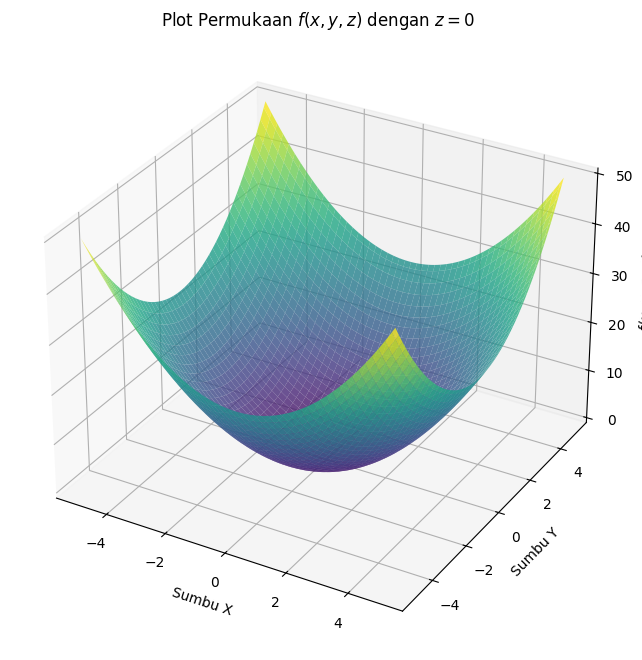

In [ ]:
# Visualisasi gradients

import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

f_numeric = sp.lambdify((x, y, z), f, 'numpy')

fig1 = plt.figure(figsize=(10, 8))
ax1 = fig1.add_subplot(111, projection='3d')

x_vals = np.linspace(-5, 5, 100)
y_vals = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(x_vals, y_vals)

Z_fixed = 0
F_slice = f_numeric(X, Y, Z_fixed)

ax1.plot_surface(X, Y, F_slice, cmap='viridis', alpha=0.8)
ax1.set_xlabel('Sumbu X')
ax1.set_ylabel('Sumbu Y')
ax1.set_zlabel(f'f(x, y, z={Z_fixed})')
ax1.set_title(f'Plot Permukaan $f(x, y, z)$ dengan $z={Z_fixed}$')
plt.show()
